<a href="https://colab.research.google.com/github/MeghanaKankanala/Projects/blob/master/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bank_marketing= pd.read_csv("bank-marketing.csv")
print(bank_marketing.shape)
bank_marketing.head()

(45211, 19)


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


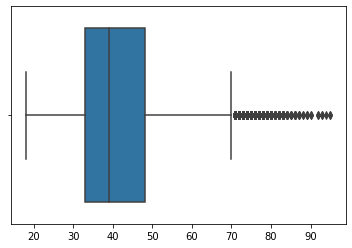

In [ ]:
sns.boxplot(bank_marketing.age.values)
plt.show()

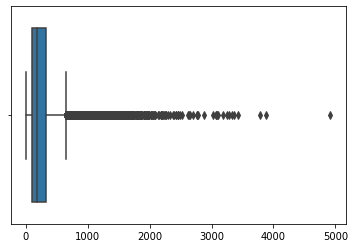

In [ ]:
sns.boxplot(bank_marketing.duration.values)
plt.show()

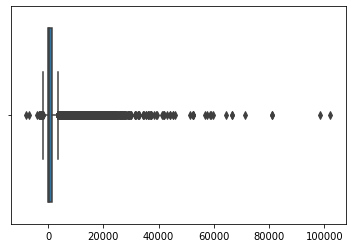

In [ ]:
sns.boxplot(bank_marketing.balance.values)
plt.show()

In [ ]:
bank_marketing.balance.value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

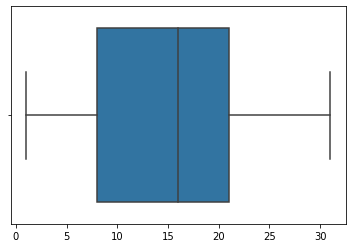

In [ ]:
sns.boxplot(bank_marketing.day.values)
plt.show()

In [ ]:
bank_marketing.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print(bank_marketing.shape)
""" checking pdays mean,median and min values"""
bank_marketing.pdays.describe()

(45211, 19)


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

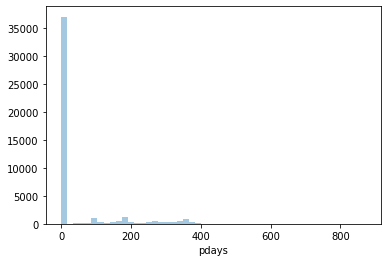

In [ ]:
sns.distplot(bank_marketing["pdays"],kde= False)

In [ ]:
indexes=bank_marketing[bank_marketing['pdays']== -1].index.values
bank_marketing["pdays"]=bank_marketing.pdays.drop(indexes, axis=0)
bank_marketing["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#yes mean and median values did change after droping -1 in pdays, mean> median imples right skewed data

(array([ 239.,  366., 1451.,  862., 1584.,  534.,  836.,  994., 1144.,
          61.,   65.,   31.,   29.,   10.,    7.,   11.,    3.,   15.,
           8.,    7.]),
 array([  1. ,  44.5,  88. , 131.5, 175. , 218.5, 262. , 305.5, 349. ,
        392.5, 436. , 479.5, 523. , 566.5, 610. , 653.5, 697. , 740.5,
        784. , 827.5, 871. ]),
 <a list of 20 Patch objects>)

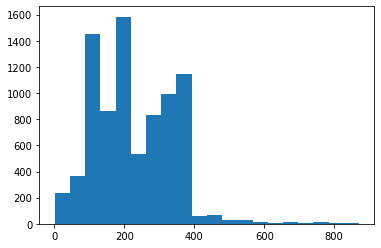

In [ ]:
plt.hist(bank_marketing["pdays"],bins=20)

In [ ]:
data=pd.DataFrame(bank_marketing.groupby(by="education")["balance"].median(), index= bank_marketing["education"].unique())
data

,balance
tertiary,577
secondary,392
unknown,568
primary,403


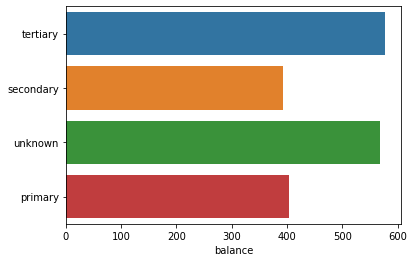

In [ ]:
sns.barplot( y=bank_marketing["education"].unique(),x="balance", data= data, orient="h")
plt.show()

#tertiary group has the highest median

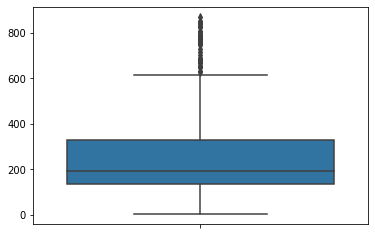

In [ ]:
sns.boxplot(bank_marketing["pdays"].values,orient="v")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
bank_marketing["response"]= encoder.fit_transform(bank_marketing["response"])
bank_marketing.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,0


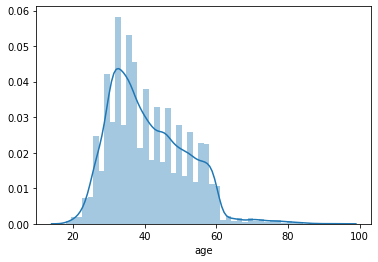

In [ ]:
sns.distplot(bank_marketing["age"])

In [ ]:
bank_marketing["poutcome"].value_counts() #'''since 37K poutcome are unknown, don't consider previous feature'''

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
bank_marketing["previous"].value_counts() #since 36K+ rows are 0s .don't consider previous feature

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [ ]:
bank_marketing["campaign"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

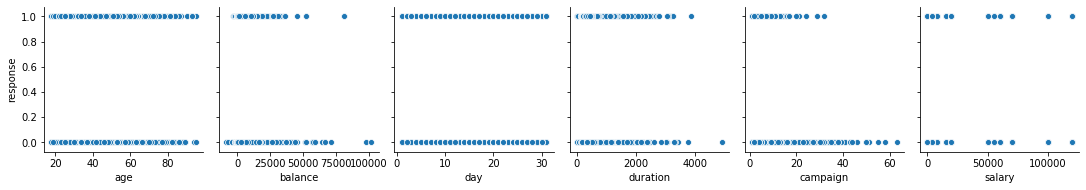

In [ ]:
sns.pairplot(x_vars=["age","balance","day","duration","campaign","salary"], y_vars=["response"],data=bank_marketing)

In [ ]:
req_num_col=["age","salary","balance","day","duration"]
df=bank_marketing[req_num_col]
df.describe()

,age,salary,balance,day,duration
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080
std,10.618762,32085.718415,3044.765829,8.322476,257.527812
min,18.000000,0.000000,-8019.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000


# since these all columns don't fall under same range , normalising this data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
bank_marketing.age= scaler.fit_transform(bank_marketing[["age"]])
bank_marketing.salary= scaler.fit_transform(bank_marketing[["salary"]])
bank_marketing.balance= scaler.fit_transform(bank_marketing[["balance"]])
bank_marketing.day= scaler.fit_transform(bank_marketing[["day"]])
bank_marketing.duration= scaler.fit_transform(bank_marketing[["duration"]])
bank_marketing.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000,45211.000000
mean,0.297873,0.475051,0.085171,0.493547,0.052494,2.763841,224.577692,0.580323,0.116985
std,0.137906,0.267381,0.027643,0.277416,0.052364,3.098021,115.344035,2.303441,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.194805,0.166667,0.073457,0.233333,0.020943,1.000000,133.000000,0.000000,0.000000
50%,0.272727,0.500000,0.076871,0.500000,0.036600,2.000000,194.000000,0.000000,0.000000
75%,0.389610,0.583333,0.085768,0.666667,0.064864,3.000000,327.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
X=pd.DataFrame()
X= bank_marketing.drop(["pdays","previous","poutcome","response"],axis=1)
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X=encoder.fit_transform(X)
X.shape

(45211, 15)

In [ ]:
Y=bank_marketing["response"]
Y.value_counts()

0    39922
1     5289
Name: response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
print(accuracy_score(Y_test,Y_predict))
print(roc_auc_score(Y_test,Y_predict))

0.8864641698613979
0.5874906740564689


In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.51      0.20      0.29      1551

    accuracy                           0.89     13564
   macro avg       0.71      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



# since the data is imbalanced use sampling with replacement technique

In [ ]:
from sklearn.utils import resample
minor_data= bank_marketing[bank_marketing["response"]==1]
major_data= bank_marketing[bank_marketing["response"]==0]
modified_minor_data=resample(minor_data,replace=True,n_samples=39922,random_state=1)
print(modified_minor_data.shape)
new_data=pd.concat([major_data,modified_minor_data])
print(new_data.shape)

(39922, 19)
(79844, 19)


In [ ]:
x=pd.DataFrame()
x= new_data.drop(["pdays","previous","poutcome","response"],axis=1)
print(x.head())
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
x=encoder.fit_transform(x)
x=pd.DataFrame(x)
y=new_data["response"]
x

        age           job    salary  marital  education targeted default  \
0  0.519481    management  0.833333  married   tertiary      yes      no   
1  0.337662    technician  0.500000   single  secondary      yes      no   
2  0.194805  entrepreneur  1.000000  married  secondary      yes      no   
3  0.376623   blue-collar  0.166667  married    unknown       no      no   
4  0.194805       unknown  0.000000   single    unknown       no      no   

    balance housing loan  contact       day month  duration  campaign  
0  0.092259     yes   no  unknown  0.133333   may  0.053070         1  
1  0.073067     yes   no  unknown  0.133333   may  0.030704         1  
2  0.072822     yes  yes  unknown  0.133333   may  0.015453         1  
3  0.086476     yes   no  unknown  0.133333   may  0.018707         1  
4  0.072812      no   no  unknown  0.133333   may  0.040260         1  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,40.0,4.0,9.0,1.0,2.0,1.0,0.0,3036.0,1.0,0.0,2.0,4.0,8.0,261.0,0.0
1,26.0,9.0,7.0,2.0,1.0,1.0,0.0,945.0,1.0,0.0,2.0,4.0,8.0,151.0,0.0
2,15.0,2.0,10.0,1.0,1.0,1.0,0.0,918.0,1.0,1.0,2.0,4.0,8.0,76.0,0.0
3,29.0,1.0,4.0,1.0,3.0,0.0,0.0,2420.0,1.0,0.0,2.0,4.0,8.0,92.0,0.0
4,15.0,11.0,0.0,2.0,3.0,0.0,0.0,917.0,0.0,0.0,2.0,4.0,8.0,198.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,6.0,7.0,8.0,2.0,1.0,1.0,0.0,1330.0,1.0,0.0,0.0,17.0,8.0,493.0,0.0
79840,67.0,5.0,6.0,1.0,0.0,1.0,0.0,6702.0,0.0,0.0,1.0,11.0,3.0,165.0,1.0
79841,13.0,4.0,9.0,2.0,2.0,0.0,0.0,1212.0,0.0,1.0,0.0,7.0,5.0,509.0,3.0
79842,5.0,7.0,8.0,2.0,1.0,1.0,0.0,1404.0,0.0,0.0,0.0,28.0,6.0,205.0,0.0


#building model without considering multicollineraity

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [ ]:
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print(accuracy_score(y_test,y_predict))
print()
print(roc_auc_score(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

0.770101026968356

0.7700868112041255

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     11992
           1       0.78      0.76      0.77     11962

    accuracy                           0.77     23954
   macro avg       0.77      0.77      0.77     23954
weighted avg       0.77      0.77      0.77     23954



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(LogisticRegression().fit(x,y),x_train,y_train,cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[0.76668456 0.73716228 0.76901056 0.7670424  0.75398103 0.77419932
 0.76632671 0.76274826 0.75755949 0.76901056]
0.7623725174449812


# building model using rfe  feature selection and checking the multi colinearity b/w features selected 

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, step=1)
rfe.fit(x,y)
print(rfe.classes_)
print(rfe.predict_proba(x))
#x=rfe.transform(x)
x=pd.DataFrame(x)
mask=rfe.support_
print(mask)
x_rfe =x.iloc[:,mask]
x_rfe

[0 1]
[[0.76975983 0.23024017]
 [0.76975983 0.23024017]
 [0.86192851 0.13807149]
 ...
 [0.48778666 0.51221334]
 [0.33775646 0.66224354]
 [0.33775646 0.66224354]]
[False False False False False False False False  True  True  True False
 False False False]


,8,9,10
0,1.0,0.0,2.0
1,1.0,0.0,2.0
2,1.0,1.0,2.0
3,1.0,0.0,2.0
4,0.0,0.0,2.0
...,...,...,...
79839,1.0,0.0,0.0
79840,0.0,0.0,1.0
79841,0.0,1.0,0.0
79842,0.0,0.0,0.0


checking the multicollinearity b/w selected features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_rfe.values, i) for i in range(x_rfe.shape[1])]
vif["features"] = x_rfe.columns
vif

,VIF Factor,features
0,1.390848,8
1,1.110916,9
2,1.312018,10


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_rfe,y,train_size=0.7,random_state=1)
model1=LogisticRegression()

In [ ]:
model1.fit(X_train,y_train)
Y_predict=model1.predict(X_test)
print(accuracy_score(y_test,Y_predict))
print()
print(roc_auc_score(y_test,Y_predict))
print()
print(classification_report(y_test,Y_predict))

0.6356767137012608

0.6356314397415253

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     11992
           1       0.65      0.60      0.62     11962

    accuracy                           0.64     23954
   macro avg       0.64      0.64      0.64     23954
weighted avg       0.64      0.64      0.64     23954



here columns 8,9,10 are my iportant features

# estimating the model perfomance using kfold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(LogisticRegression().fit(x_rfe,y),X_train,y_train,cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[0.63714439 0.63106101 0.63857577 0.64000716 0.63624978 0.63768116
 0.64430131 0.63714439 0.63911254 0.6364287 ]
0.6377706208624083


accuracy is 0.64 , precision is 0.65,recall is 0.6

#housing, loan and contact are the importanat features of my model

# building a randomforest model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators =40 ,
                               max_depth=9,
                               max_features = 3,
                               random_state = 1) # all the columns

model2.fit(x_train, y_train)
yf_predict = model2.predict(x_test)

from sklearn.metrics import accuracy_score
print(model2.feature_importances_)
print()
print (accuracy_score(y_test, yf_predict))

[0.05498569 0.00990027 0.01245816 0.01181244 0.01123739 0.00439399
 0.00084012 0.04096695 0.06423856 0.0114733  0.09874651 0.0229198
 0.08598876 0.5481778  0.02186026]

0.850254654754947


# estimating model performance using kfold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(model2.fit(x,y),x_train,y_train,cv=10)
print(cv_scores)
print("mean accuracy of model is:" ,np.mean(cv_scores))

[0.85471462 0.84254786 0.84827339 0.84791555 0.84719986 0.85059939
 0.84093756 0.83843264 0.8459474  0.84380032]
mean accuracy of model is: 0.8460368581141529


In [ ]:
print(classification_report(y_test,yf_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     11992
           1       0.82      0.90      0.86     11962

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



precision :0.82 ,recall:0.90,accuracy:0.85

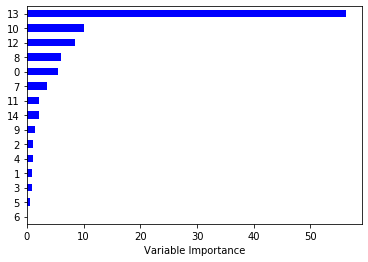

In [ ]:
Importance = pd.DataFrame({'Importance':model2.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
columns={0:"age",1:"job",2:"salary",3:"marital",4:"education",5:"targeted",6:"default",7:" balance",8:" housing",9:" loan",10:"contact",11:"day ",12:"month",13:"  duration",14:"campaign"}
print(columns)

{0: 'age', 1: 'job', 2: 'salary', 3: 'marital', 4: 'education', 5: 'targeted', 6: 'default', 7: ' balance', 8: ' housing', 9: ' loan', 10: 'contact', 11: 'day ', 12: 'month', 13: '  duration', 14: 'campaign'}


 my top 3 features in this random forest model are (13,10,12)duration , contact and month 

#i choose to use classification_report since classification_report gives me precision,recall and accuracy of the model, 

#Randomforest model has better performance on test data set

    No, the top features in both the models are different :
    in 1st model(lr) are housing, loan and contact 
    in 2nd model(rf)  are duration , contact and month 